812
812


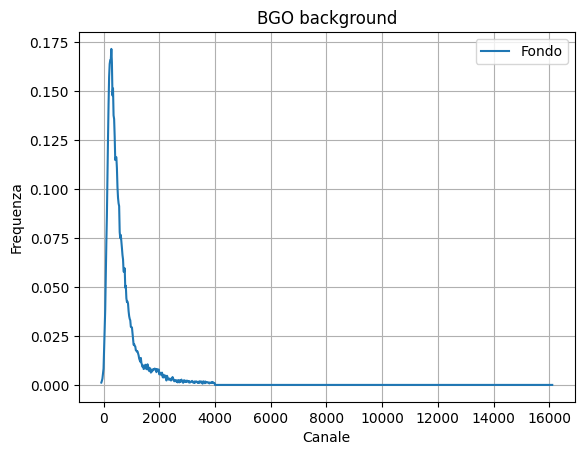

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm, chi2


def repeat_fit(ls, left_bound, right_bound, mu, sigma, A, ampiezza_picco_limite, dis=False, limit_ADC=100):
    '''
    ampiezza picco limite = è la ampiezza dell'intorno di mu in cui è accettabile avere il picco
    '''
    peak_list = []
    error_peak_list = []
    sigma_list = []
    error_sigma_list = []
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC) & (channel < right_bound-delta_ADC/2)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    for delta_ADC in np.arange(0, abs(right_bound-left_bound)/2+limit_ADC, 10):
        ls.mask = (channel > left_bound+delta_ADC/2) & (channel < right_bound-delta_ADC)
        m = Minuit(ls, mu=mu, sigma=sigma, A=A)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['mu'] < (mu+ampiezza_picco_limite/2) and m.values['mu'] > (mu-ampiezza_picco_limite/2):    
                peak_list.append(m.values['mu'])
                error_peak_list.append(m.errors['mu'])
                sigma_list.append(m.values['sigma'])
                error_sigma_list.append(m.errors['sigma'])
                if dis==True: display(m)
        ls.mask = None
    return np.array(peak_list), np.array(error_peak_list), np.array(sigma_list), np.array(error_sigma_list)

data = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\BGO\Fondo BGO\BGO-fondo-newgate.CSV', sep=';') # fondo
data1 = pd.read_csv(r'C:\Users\Black\Desktop\Esperimentazioni di Nucleare e Subnucleare\SiPM\Caratterizzazione Cristalli\BGO\Torio\BGO_torio.csv', sep=' \t', engine='python')

channel_back = np.array(data['Channel']) 
counts_back = np.array(data['Counts'])
time_back = 9218 #s
frequency_back = counts_back/time_back

counts_Th = np.array(data1['Counts'])
channel_Th = np.arange(-90, 30000, 20)[:len(counts_Th)]
time_Th = 1196 #s
frequency_Th = counts_Th/time_Th

# devo allungare il fondo con tanti zeri
allungo_x = np.arange(3990, 100000000, 20)
allungo_y = np.zeros(len(allungo_x))
channel_back = np.concatenate((channel_back, allungo_x))[:len(frequency_Th)]
counts_back = np.concatenate((counts_back, allungo_y))[:len(frequency_Th)]
frequency_back = np.concatenate((frequency_back, allungo_y))[:len(frequency_Th)]

print(len(channel_back))
print(len(frequency_Th))

plt.plot(channel_back, frequency_back, label='Fondo')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('BGO background')
plt.legend()
plt.grid()
plt.show()

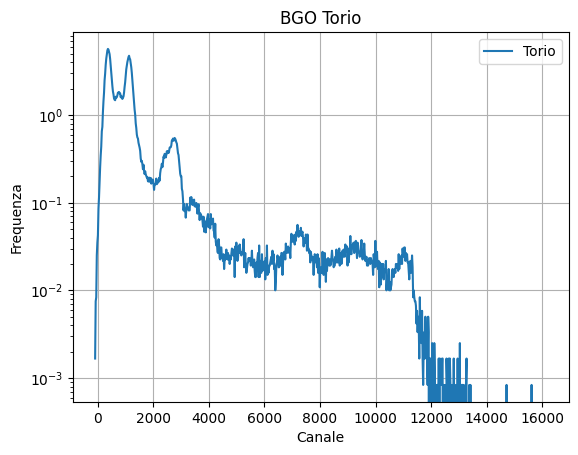

In [7]:
plt.plot(channel_Th, frequency_Th, label='Torio')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('BGO Torio')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

channel = channel_back
frequency = frequency_Th - frequency_back

for i in range(len(frequency)):
    if frequency[i] < 0:
        frequency[i] = 0

import plotly.express as px
fig = px.line(x=channel, y=frequency, title='Torio')
fig.show()

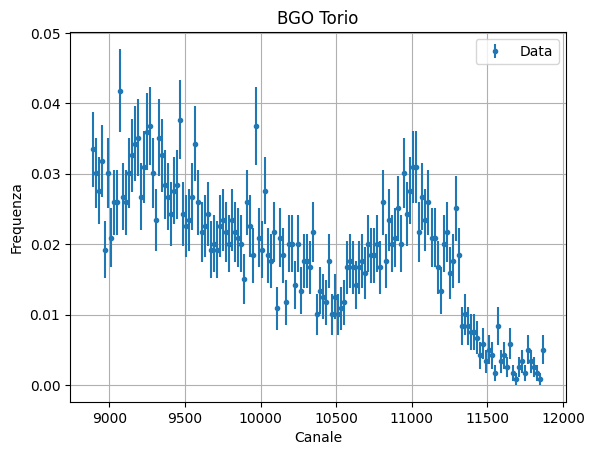

[10941.45974982 10942.63415534 10942.63415534 10944.11530625
 10944.11530625 10945.74694696 10945.74694696 10952.5487833
 10952.5487833  10959.81210501 10959.81210501 10966.13145931
 10966.13145931 10968.66520844 10968.66520844 10974.0946577
 10974.0946577  10979.70316852 10979.70316852 10981.84371104
 10981.84371104 10989.86276885 10989.86276885 11010.05415907
 11010.05415907 11003.77645095 11003.77645095 11012.63353707
 11012.63353707 11013.21507796 11013.21507796 10968.49499511
 10968.49499511 10941.45974982 10942.64662389 10942.63415534
 10944.07426847 10944.07426847 10945.73335476 10945.99394156
 10952.90184636 10952.90184636 10960.13112888 10959.80702839
 10965.95767537 10965.95767537 10968.55249497 10968.63873853
 10979.66982229 10979.95918565 10982.66547233 10982.66547233
 10990.4397138  11001.65688344 11013.67034568 11013.67034568
 11014.20476305 11014.20476305 11007.16371791 11007.70313229
 10994.10218097 10994.10218097 10997.73017886 10992.84809338
 10896.27744236 10896.2774

In [8]:
def func(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

error = np.sqrt(counts_Th/time_Th**2 + counts_back/time_back**2)

plt.errorbar(channel[450:600], frequency[450:600], yerr=error[450:600], fmt='.', label='Data')
plt.xlabel('Canale')
plt.ylabel('Frequenza')
plt.title('BGO Torio')
plt.legend()
plt.grid()
plt.show()

ls = LeastSquares(channel, frequency, error, func)

peak_list2614_5, error_peak_list2614_5, sigma_list2614_5, err_sigma_list2614_5 = repeat_fit(ls, 10500, 11600, 11000, 400, 0.03, 400, dis=False)

print(peak_list2614_5)
print(error_peak_list2614_5)

In [9]:
def weighted_mean(values, errors):
    mean = np.sum(values/(errors**2))/np.sum(1/(errors**2))
    error_mean = np.sqrt((abs(np.max(values) - np.min(values))/2)**2 + (1/np.sum(1/(errors**2))))

    return mean, error_mean

mean, error_mean = weighted_mean(peak_list2614_5, error_peak_list2614_5)
print(mean, error_mean)

sigma_mean, error_sigma_mean = weighted_mean(sigma_list2614_5, err_sigma_list2614_5)
print(sigma_mean, error_sigma_mean)


10962.757949270408 118.82749241644167
293.00459411819367 118.37562519385193


In [10]:
def func(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

peak_list300, error_peak_list300, sigma_list300, err_sigma_list300 = repeat_fit(ls, 850, 1360, 1130, 100, 5, 200, dis=False)

print(peak_list300)
print(error_peak_list300)

mean, error_mean = weighted_mean(peak_list300, error_peak_list300)
print(mean, error_mean)

sigma_mean, error_sigma_mean = weighted_mean(sigma_list300, err_sigma_list300)
print(sigma_mean, error_sigma_mean)

[1124.7264165  1125.12090779 1125.13510258 1128.24764967 1124.7047797
 1124.7047797  1125.20290675 1125.20290675 1126.46797575 1126.46797575
 1127.81211166 1127.81211166 1133.28005751 1133.28005751 1116.48980915
 1116.48980915 1107.9266757 ]
[ 0.85561155  1.09088345  1.09036021  2.63080485  0.78244967  0.78244967
  0.94056227  0.94056227  1.1467926   1.1467926   2.44707112  2.44707112
 19.35047999 19.35047999 12.61195671 12.61195671 31.17069992]
1125.2734209588605 12.680413758184507
114.58595389815774 6.118122487060082
